In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import odeint


Time, h
[0.         0.12244898 0.24489796 0.36734694 0.48979592 0.6122449
 0.73469388 0.85714286 0.97959184 1.10204082 1.2244898  1.34693878
 1.46938776 1.59183673 1.71428571 1.83673469 1.95918367 2.08163265
 2.20408163 2.32653061 2.44897959 2.57142857 2.69387755 2.81632653
 2.93877551 3.06122449 3.18367347 3.30612245 3.42857143 3.55102041
 3.67346939 3.79591837 3.91836735 4.04081633 4.16326531 4.28571429
 4.40816327 4.53061224 4.65306122 4.7755102  4.89795918 5.02040816
 5.14285714 5.26530612 5.3877551  5.51020408 5.63265306 5.75510204
 5.87755102 6.        ]
V(t), m3
[0.1        0.1122449  0.1244898  0.13673469 0.14897959 0.16122449
 0.17346939 0.18571429 0.19795918 0.21020408 0.22244898 0.23469388
 0.24693878 0.25918367 0.27142857 0.28367347 0.29591837 0.30816327
 0.32040816 0.33265306 0.34489796 0.35714286 0.36938776 0.38163265
 0.39387755 0.40612245 0.41836735 0.43061224 0.44285714 0.45510204
 0.46734694 0.47959184 0.49183673 0.50408163 0.51632653 0.52857143
 0.54081633 0.55306122

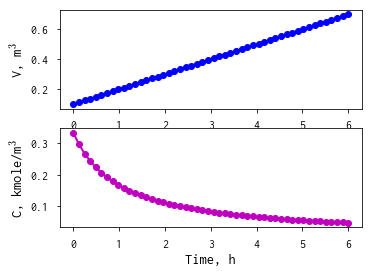

In [10]:
# Przykład 1. Rozcieńczanie roztworu
# przy założeniu ro=const
# Accumulation = In − Out -/+ Rxn
# jednostki!

def model(y, t):
    V = y[0]
    dVdt = Fin
    return [dVdt]

m = 5.0                 # kg
M = 150.0               # kg/kmol
n = m/M                 # kmol
Fin = 0.1               # m3/h
t = np.linspace(0, 6)  # 0 - 6h

ic = [0.1]                # initial conditions: V at t=0 -> V0=0.1m3 
results = odeint(model, ic, t)
V = results[:,0]        # instant V
C = n/V                 # instant C
print("Time, h")
print(t)
print("V(t), m3")
print(V)
print("C(t), kmol/m3")
print(C)

plt.subplot(211)
plt.plot(t,V, 'bo-')
plt.xlabel('Time, h')
plt.ylabel('V, m$^3$')
plt.subplot(212)
plt.plot(t,C, 'mo-')
plt.xlabel('Time, h')
plt.ylabel('C, kmole/m$^3$')
plt.show()

Time, min
[ 0.          1.2244898   2.44897959  3.67346939  4.89795918  6.12244898
  7.34693878  8.57142857  9.79591837 11.02040816 12.24489796 13.46938776
 14.69387755 15.91836735 17.14285714 18.36734694 19.59183673 20.81632653
 22.04081633 23.26530612 24.48979592 25.71428571 26.93877551 28.16326531
 29.3877551  30.6122449  31.83673469 33.06122449 34.28571429 35.51020408
 36.73469388 37.95918367 39.18367347 40.40816327 41.63265306 42.85714286
 44.08163265 45.30612245 46.53061224 47.75510204 48.97959184 50.20408163
 51.42857143 52.65306122 53.87755102 55.10204082 56.32653061 57.55102041
 58.7755102  60.        ]
V(t), L
[  0.          11.02040816  22.04081633  33.06122449  44.08163265
  55.10204082  66.12244898  77.14285714  88.16326531  99.18367347
 110.20408163 121.2244898  132.24489796 143.26530612 154.28571429
 165.30612245 176.32653061 187.34693878 198.36734694 209.3877551
 220.40816327 231.42857143 242.44897959 253.46938776 264.48979592
 275.51020408 286.53061224 297.55102041 308

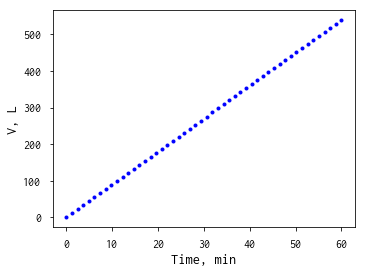

In [12]:
# Przykład 2. 
#  napełnianie + opróżnianie zbiornika 
#  założenie ro = const
#  Accumulation = In − Out -/+ Rxn

def model(y, t):
    V = y[0]
    dVdt = Fin - Fout
    return [dVdt]

Fin = 10 #L/min
Fout = 1 #L/min
t = np.linspace(0,60) # 0 - 60 min

ic = [0] # initial conditions: V at t=0 -> V0=0 

results = odeint(model, ic, t)
V = results[:,0]
print("Time, min")
print(t)
print("V(t), L")
print(V) # V(t)

plt.plot(t,V, 'b.')
plt.xlabel('Time, min')
plt.ylabel('V, L')
plt.show()


Time, min
[  0.          12.24489796  24.48979592  36.73469388  48.97959184
  61.2244898   73.46938776  85.71428571  97.95918367 110.20408163
 122.44897959 134.69387755 146.93877551 159.18367347 171.42857143
 183.67346939 195.91836735 208.16326531 220.40816327 232.65306122
 244.89795918 257.14285714 269.3877551  281.63265306 293.87755102
 306.12244898 318.36734694 330.6122449  342.85714286 355.10204082
 367.34693878 379.59183673 391.83673469 404.08163265 416.32653061
 428.57142857 440.81632653 453.06122449 465.30612245 477.55102041
 489.79591837 502.04081633 514.28571429 526.53061224 538.7755102
 551.02040816 563.26530612 575.51020408 587.75510204 600.        ]
V(t), L
[1.         1.12244898 1.24489796 1.36734694 1.48979592 1.6122449
 1.73469388 1.85714286 1.97959184 2.10204082 2.2244898  2.34693878
 2.46938776 2.59183673 2.71428571 2.83673469 2.95918367 3.08163265
 3.20408163 3.32653061 3.44897959 3.57142857 3.69387755 3.81632653
 3.93877551 4.06122449 4.18367347 4.30612245 4.42857143

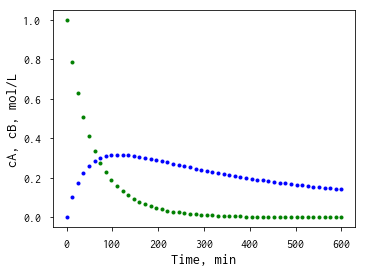

In [27]:
# Przykład 3. 
#  napełnianie rozpuszczalnikiem (Fin) + reakcja
#  w zbiorniku zachodzi reakcja: A -> B, k
#  założenie ro = const
#  Accumulation = In − Out -/+ Rxn

def model(y, t):
                      # funkcje czasu
    V = y[0]          # ponieważ V=f(t), zamiast c[mol/L] => n[mol]
    nA = y[1]
    nB = y[2]
    
    # chwilowe stężenia dla chwilowej objętości
    cA = nA/V
    cB = nB/V
    
    #model kinetyczny - UWAGA! ilości moli
    # spr. jednoski
    dnAdt = -k*cA*V
    dnBdt = k*cA*V
    dVdt = Fin
    return [dVdt, dnAdt, dnBdt]

Fin = 0.01 #L/s
k = 1e-2 #1/s
t = np.linspace(0,600) # 0 - 600 s

V0 = 1 #L
nA0 = 1 #mol
nB0 = 0 #mol

results = odeint(model, [V0, nA0, nB0], t)
V = results[:,0]
nA = results[:,1]
nB = results[:,2]

cA = nA/V
cB = nB/V


print("Time, min")
print(t)
print("V(t), L")
print(V) # V(t)

#plt.plot(t,V, 'r.')
plt.plot(t,cA, 'g.')
plt.plot(t,cB, 'b.')

plt.xlabel('Time, min')
plt.ylabel('cA, cB, mol/L')
plt.show()


In [28]:
print(nA+nB)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
